In [6]:
!nvidia-smi                    

Sat Apr  3 15:40:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
# unrar x "/content/drive/MyDrive/IDC_regular_ps50_idx5.rar" "/content/drive/MyDrive/"
# !unzip "/content/drive/MyDrive/base_dir/train_dir/b_idc.zip" -d "/content/drive/MyDrive/base_dir/train_dir"
import os

In [8]:
! pip install -q kaggle

In [9]:
from google.colab import files

In [10]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhruvilshah934","key":"1293dc5722bb49e1070891501522163d"}'}

In [11]:
 ! mkdir ~/.kaggle

In [12]:
! cp kaggle.json ~/.kaggle/

In [13]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [14]:
 ! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              222KB  2021-04-03 08:45:43           1669  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1100  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            869  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            392  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [15]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

 99% 3.08G/3.10G [00:52<00:00, 45.6MB/s]
100% 3.10G/3.10G [00:52<00:00, 63.3MB/s]


In [16]:
! mkdir breast-histopathology-images

In [17]:
! unzip breast-histopathology-images.zip -d breast-histopathology-images

Streaming output truncated to the last 5000 lines.
  inflating: breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.p

In [18]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 47kB/s 


In [19]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2

import imageio
import skimage
import skimage.io
import skimage.transform

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
SAMPLE_SIZE = 78786

IMAGE_SIZE = 224

In [21]:
os.listdir('/content/breast-histopathology-images')

['12820',
 '15513',
 '9320',
 '14305',
 '8955',
 '14304',
 '12886',
 '12868',
 '12824',
 '15839',
 '9077',
 '13689',
 '15902',
 '9123',
 '12883',
 '14209',
 '10258',
 '9226',
 '10293',
 '12818',
 '9261',
 '13693',
 '13688',
 '13691',
 'IDC_regular_ps50_idx5',
 '16896',
 '10305',
 '12905',
 '10272',
 '12929',
 '9291',
 '8867',
 '8916',
 '15471',
 '12895',
 '10302',
 '16534',
 '10295',
 '12880',
 '9346',
 '12900',
 '14210',
 '9081',
 '14154',
 '12826',
 '12752',
 '9323',
 '12931',
 '9135',
 '15512',
 '12884',
 '12748',
 '9124',
 '9173',
 '13402',
 '15840',
 '12947',
 '10285',
 '9262',
 '12869',
 '12821',
 '8959',
 '9023',
 '9177',
 '16085',
 '9267',
 '9083',
 '9041',
 '15514',
 '13018',
 '13461',
 '8975',
 '9125',
 '10262',
 '9043',
 '15633',
 '9347',
 '12817',
 '9257',
 '12935',
 '12894',
 '9178',
 '13692',
 '9044',
 '10290',
 '10303',
 '9225',
 '14188',
 '12819',
 '12951',
 '9022',
 '10256',
 '16553',
 '10276',
 '9382',
 '12901',
 '15632',
 '10257',
 '12878',
 '13694',
 '10273',
 '1027

In [22]:
patient = os.listdir('/content/breast-histopathology-images/IDC_regular_ps50_idx5')
len(patient)

279

In [23]:
#Copy all images into one directory
#This will make it easier to work with this data.
# Create a new directory to store all available images
all_images = 'all_images'
os.mkdir(all_images)

In [24]:
patient_list = os.listdir('/content/breast-histopathology-images/IDC_regular_ps50_idx5')

In [25]:
print(patient_list)

['12820', '15513', '9320', '14305', '8955', '14304', '12886', '12868', '12824', '15839', '9077', '13689', '15902', '9123', '12883', '14209', '10258', '9226', '10293', '12818', '9261', '13693', '13688', '13691', '16896', '10305', '12905', '10272', '12929', '9291', '8867', '8916', '15471', '12895', '10302', '16534', '10295', '12880', '9346', '12900', '14210', '9081', '14154', '12826', '12752', '9323', '12931', '9135', '15512', '12884', '12748', '9124', '9173', '13402', '15840', '12947', '10285', '9262', '12869', '12821', '8959', '9023', '9177', '16085', '9267', '9083', '9041', '15514', '13018', '13461', '8975', '9125', '10262', '9043', '15633', '9347', '12817', '9257', '12935', '12894', '9178', '13692', '9044', '10290', '10303', '9225', '14188', '12819', '12951', '9022', '10256', '16553', '10276', '9382', '12901', '15632', '10257', '12878', '13694', '10273', '10279', '16895', '16555', '8865', '12934', '10268', '13022', '9175', '10299', '13106', '10253', '9228', '10286', '10307', '9250', 

In [26]:
for patient in patient_list:
  # /content/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1001_class0.png
    path_0 = "/content/breast-histopathology-images/IDC_regular_ps50_idx5/"+str(patient)+"/0"
    path_1 = "/content/breast-histopathology-images/IDC_regular_ps50_idx5/"+str(patient)+"/1"
    
    #list for 0
    file_list_0 = os.listdir(path_0)
    #list for 1
    file_list_1 = os.listdir(path_1)
    
    #move all 0 related img of a patient to all_image directory
    for fname in file_list_0:
        #src path of image
        src = os.path.join(path_0, fname)
        #dst path for image
        dst = os.path.join(all_images, fname)
        #move the image to directory
        shutil.copyfile(src, dst)
        
    #move all 1 related img of a patient to all_image directory
    for fname in file_list_1:
        #src path of image
        src = os.path.join(path_1, fname)
        #dst path for image
        dst = os.path.join(all_images, fname)
        #move the image to directory
        shutil.copyfile(src, dst)

In [27]:
len(os.listdir('all_images'))

277524

In [28]:
image_list = os.listdir('all_images')

df_data = pd.DataFrame(image_list, columns=['image_id'])

df_data.head()

,image_id
0,12908_idx5_x1551_y401_class0.png
1,12877_idx5_x1851_y451_class0.png
2,9250_idx5_x1801_y1151_class1.png
3,15514_idx5_x451_y1701_class0.png
4,15510_idx5_x2251_y2351_class0.png


In [29]:
# Define Helper Functions

# Each file name has this format:
# '14211_idx5_x2401_y1301_class1.png'

def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    # the id is the first index in the list
    patient_id = a[0]
    
    return patient_id

def extract_target(x):
    # split into a list
    a = x.split('_')
    # the target is part of the string in index 4
    b = a[4]
    # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
    target = b[5]
    
    return target

# extract the patient id

# create a new column called 'patient_id'
df_data['patient_id'] = df_data['image_id'].apply(extract_patient_id)
# create a new column called 'target'
df_data['target'] = df_data['image_id'].apply(extract_target)

df_data.head(10)

,image_id,patient_id,target
0,12908_idx5_x1551_y401_class0.png,12908,0
1,12877_idx5_x1851_y451_class0.png,12877,0
2,9250_idx5_x1801_y1151_class1.png,9250,1
3,15514_idx5_x451_y1701_class0.png,15514,0
4,15510_idx5_x2251_y2351_class0.png,15510,0
5,16550_idx5_x701_y1901_class0.png,16550,0
6,13400_idx5_x1501_y1951_class0.png,13400,0
7,14305_idx5_x1551_y201_class0.png,14305,0
8,13022_idx5_x1601_y951_class0.png,13022,0
9,10275_idx5_x2301_y601_class1.png,10275,1


In [30]:
df_data.shape

(277524, 3)

In [31]:

def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    
    """
    Give a column in a dataframe,
    this function takes a sample of each class and displays that
    sample on one row. The sample size is the same as figure_cols which
    is the number of columns in the figure.
    Because this function takes a random sample, each time the function is run it
    displays different images.
    """
    

    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['image_id']
            im=cv2.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()

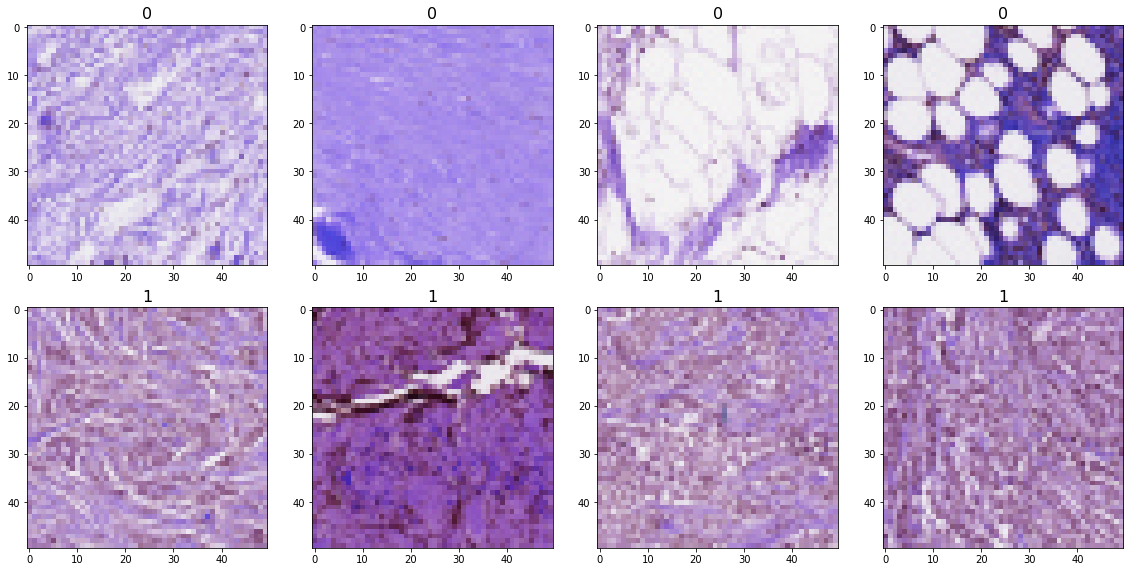

In [32]:
IMAGE_PATH = 'all_images/'

draw_category_images('target',4, df_data, IMAGE_PATH)

In [33]:
# What is the class distribution?

df_data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

In [34]:
# take a sample of the majority class 0 (total = 198738)
df_0 = df_data[df_data['target'] == '0'].sample(SAMPLE_SIZE, random_state=101)
# take a sample of class 1 (total = 78786)
df_1 = df_data[df_data['target'] == '1'].sample(SAMPLE_SIZE, random_state=101)

# concat the two dataframes
df_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)

# Check the new class distribution
df_data['target'].value_counts()

1    78786
0    78786
Name: target, dtype: int64

In [35]:
# train_test_split

# stratify=y creates a balanced validation set.
y = df_data['target']

df_train, df_val = train_test_split(df_data, test_size=0.10, random_state=101, stratify=y)

print(df_train.shape)
print(df_val.shape)

(141814, 3)
(15758, 3)


In [36]:
df_train['target'].value_counts()

1    70907
0    70907
Name: target, dtype: int64

In [37]:
df_val['target'].value_counts()

0    7879
1    7879
Name: target, dtype: int64

In [38]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train_dir
    # a_no_idc
    # b_has_idc

# val_dir
    # a_no_idc
    # b_has_idc



# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
a_no_idc = os.path.join(train_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(train_dir, 'b_has_idc')
os.mkdir(b_has_idc)


# create new folders inside val_dir
a_no_idc = os.path.join(val_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(val_dir, 'b_has_idc')
os.mkdir(b_has_idc)


In [39]:
# check that the folders have been created
os.listdir('base_dir/train_dir')

['b_has_idc', 'a_no_idc']

In [40]:
# Set the id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [41]:
# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])



# Transfer the train images

for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    
    # source path to image
    src = os.path.join(all_images, fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)
    

# Transfer the val images

for image in val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    

    # source path to image
    src = os.path.join(all_images, fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst) 

In [42]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/a_no_idc')))
print(len(os.listdir('base_dir/train_dir/b_has_idc')))

70907
70907


In [43]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/a_no_idc')))
print(len(os.listdir('base_dir/val_dir/b_has_idc')))


7879
7879


In [44]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'


num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [45]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 141814 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.


In [46]:
from tensorflow.keras.models import *
from sklearn.model_selection import *
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *



base_Neural_Net= ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_Neural_Net)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100352)            401408    
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________

In [47]:
model.compile('adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [48]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, 
                                   verbose=1, mode='max')
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=10, verbose=1,
                   callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
14182/14182 [==============================] - 1200s 82ms/step - loss: 0.4580 - accuracy: 0.8059 - val_loss: 0.4416 - val_accuracy: 0.7979
Epoch 2/10
14182/14182 [==============================] - 1167s 82ms/step - loss: 0.3677 - accuracy: 0.8499 - val_loss: 0.3633 - val_accuracy: 0.8445
Epoch 3/10
14182/14182 [==============================] - 1174s 83ms/step - loss: 0.3397 - accuracy: 0.8626 - val_loss: 2.2864 - val_accuracy: 0.5389
Epoch 4/10
14182/14182 [==============================] - 1175s 83ms/step - loss: 0.3157 - accuracy: 0.8742 - val_loss: 0.6681 - val_accuracy: 0.6573
Epoch 5/10
14182/14182 [==============================] - 1176s 83ms/step - loss: 0.3100 - accuracy: 0.8759 - val_loss: 0.3391 - val_accuracy: 0.8690
Epoch 6/10
14182/14182 [==============================] - 1175s 83ms/step - loss: 0.3000 - accuracy: 0.8797 - val_loss: 0.9111 - val_accuracy: 0.6587
Epoch 7/10
14182/14182 [==============================] - 1176s 83ms/step - loss: 0.2911 - accuracy:

In [49]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

In [50]:
val_loss, val_acc = \
model.evaluate(test_gen, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

15758/15758 [==============================] - 169s 11ms/step - loss: 0.5139 - accuracy: 0.8220
val_loss: 0.5139365196228027
val_acc: 0.821995198726654


<Figure size 432x288 with 0 Axes>

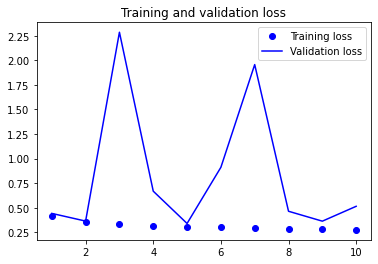

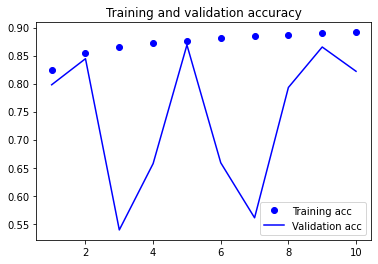

<Figure size 432x288 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc , 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [52]:
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


15758/15758 [==============================] - 151s 10ms/step


In [53]:
predictions.shape

(15758, 2)

In [54]:
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

In [55]:
df_preds = pd.DataFrame(predictions, columns=['no_idc', 'has_idc'])

#df_preds.head()
df_preds

,no_idc,has_idc
0,0.998794,0.001206
1,0.998808,0.001192
2,0.999971,0.000029
3,0.999975,0.000025
4,0.999669,0.000331
...,...,...
15753,0.828075,0.171925
15754,0.015847,0.984153
15755,0.068358,0.931642
15756,0.017293,0.982707


In [56]:
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_idc']

In [57]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)

0.9131790755535386

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [59]:
test_labels = test_gen.classes

In [60]:
test_labels.shape

(15758,)

In [61]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))


In [62]:
test_gen.class_indices


{'a_no_idc': 0, 'b_has_idc': 1}

Confusion matrix, without normalization
[[7391  488]
 [2317 5562]]


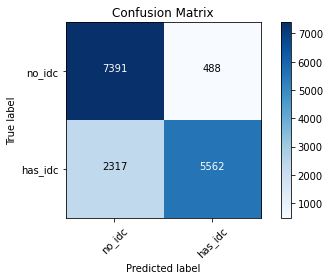

In [63]:
cm_plot_labels = ['no_idc', 'has_idc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [64]:
from sklearn.metrics import classification_report

# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

      no_idc       0.76      0.94      0.84      7879
     has_idc       0.92      0.71      0.80      7879

    accuracy                           0.82     15758
   macro avg       0.84      0.82      0.82     15758
weighted avg       0.84      0.82      0.82     15758



In [65]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model.save("/content/drive/MyDrive/ResNet50.h5")

NameError: ignored

In [67]:
yy = model.predict(test_gen)

In [68]:
len(yy)
yy

array([[9.9879432e-01, 1.2057149e-03],
       [9.9880838e-01, 1.1915932e-03],
       [9.9997103e-01, 2.8969838e-05],
       ...,
       [6.8357542e-02, 9.3164241e-01],
       [1.7293300e-02, 9.8270667e-01],
       [9.6318948e-01, 3.6810502e-02]], dtype=float32)

In [69]:
yy = np.argmax(yy, axis=1)
yy

array([0, 0, 0, ..., 1, 1, 0])